In [2]:
# Understanding Data - Data Visualisation

In [3]:
import numpy as np
np.random.seed(210187)
import matplotlib.pyplot as plt

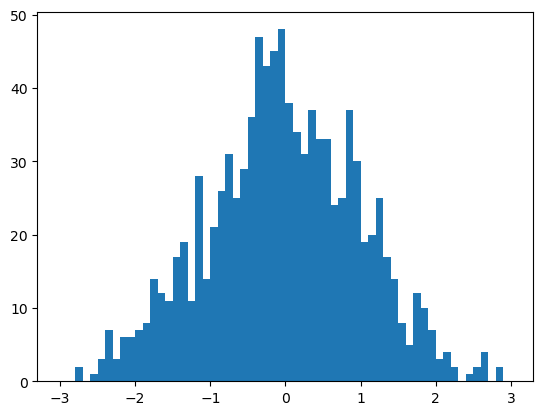

In [4]:
# Histogram 
x = np.random.normal(size=1000)
_ = plt.hist(x, range=(-3,3), bins=60)

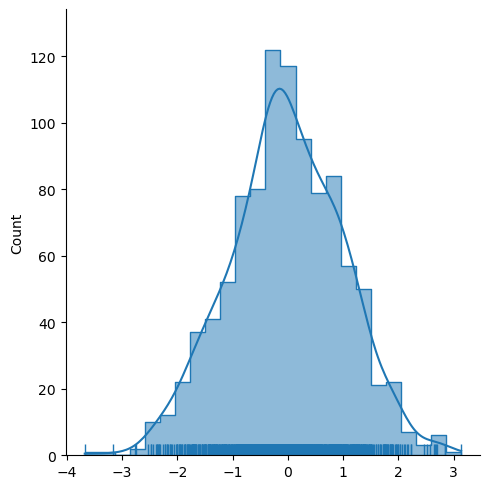

In [5]:
# Using Seaborn
import seaborn as sns
_ = sns.displot(x, element="step", kde=True, rug=True)

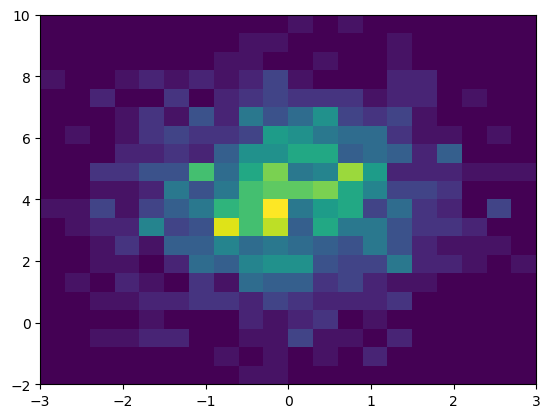

In [6]:
# 2D Histogram 
y = np.random.normal(4,2, size=1000)
_ = plt.hist2d(x, y, range=((-3,3),(-2,10)), bins=20)

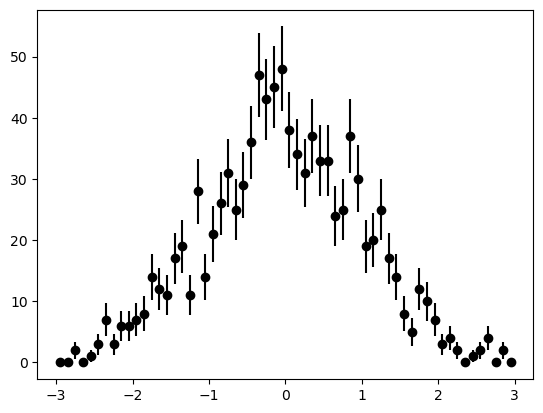

In [7]:
# Errors on Histogram
nh, xe = np.histogram(x, range=(-3,3), bins=60)
cx = 0.5*(xe[:-1] + xe[1:])
_ = plt.errorbar( cx, nh, yerr=nh**0.5, fmt='ko' )

In [ ]:
# Histogram with weights 

In [8]:
# Set bin count equal to sum of weights in bin
w = np.random.uniform(9.5,10.5,size=1000)
# Store sum of weights and sum of squared weights 
nh, xe = np.histogram(x, range=(-3,3), bins=60, weights=w) 
nh2, xe = np.histogram(x, range=(-3,3), bins=60, weights=w**2)

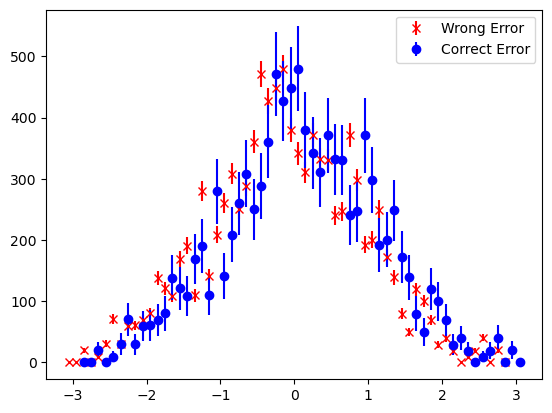

In [9]:
# plot with the naive square-root ("wrong error") and with the square-root of the sum of squared weights ("correct error")
plt.errorbar( cx-0.1, nh, nh**0.5, fmt='rx', label='Wrong Error')
plt.errorbar( cx+0.1, nh, nh2**0.5, fmt='bo', label='Correct Error')
_ = plt.legend() 

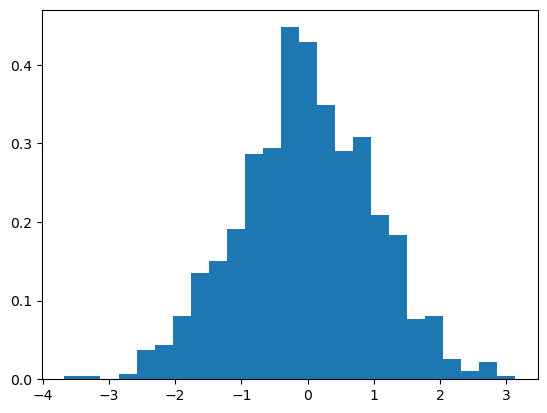

In [10]:
# Histogram as probability density 
_ = plt.hist( x, bins='auto', density=True ) 

In [11]:
# code for making dataframe
import os
import pandas as pd
regen = True
if regen or not os.path.exists('data/class.pkl'):
    size = 500
    df = pd.DataFrame( columns=['Height','Weight','Gender','Distance','Age','Day Of Birth'])
    
    df['Gender'] = np.random.choice(['M','F','NB'], p=[0.45,0.45,0.1], size=size)
    
    nm = len(df.query("Gender=='M'"))
    nf = len(df.query("Gender=='F'"))
    nn = len(df.query("Gender=='NB'"))
    
    df.loc[ df.Gender=='M', 'Height'] = np.random.normal(175, 6.35, size=nm )
    df.loc[ df.Gender=='F', 'Height'] = np.random.normal(162, 5.59, size=nf )
    df.loc[ df.Gender=='NB', 'Height'] = np.random.normal(168, 6, size=nn )
    
    df['Weight'] = 0.5*df['Height'] + np.random.normal(0,10,size=size)
    
    df['Age'] = np.random.randint(21,30,size=size)
    
    df['Distance'] = np.random.exponential(1.2,size=size)

    df['Day Of Birth'] = np.random.choice( ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], size=size)
    
    df = df.astype( {'Height': np.float64, 'Weight': np.float64, 'Gender': str, 'Distance': np.float64, 'Age': np.int32, 'Day Of Birth': str } )

    print(df)
    
    os.system('mkdir -p data')
    df.to_pickle('data/class.pkl')

         Height     Weight Gender  Distance  Age Day Of Birth
0    158.733745  96.377157      F  0.757757   23          Sun
1    148.116875  62.718173      F  1.536026   23          Fri
2    160.267188  75.680195     NB  0.752851   22          Fri
3    183.687279  96.008974      M  1.000731   21          Thu
4    171.136394  76.824553      M  1.428973   28          Tue
..          ...        ...    ...       ...  ...          ...
495  185.976881  85.713709      M  0.198725   28          Mon
496  173.285989  90.281529      M  0.557051   26          Tue
497  163.626104  82.561855      F  2.159282   25          Thu
498  182.547169  82.830470      M  0.745164   24          Tue
499  155.846073  72.390845      F  2.804736   29          Mon

[500 rows x 6 columns]


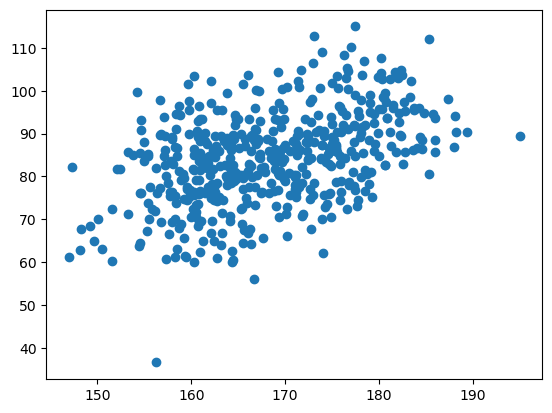

In [13]:
# Scatter plot 
plt.scatter( df['Height'], df['Weight'] )

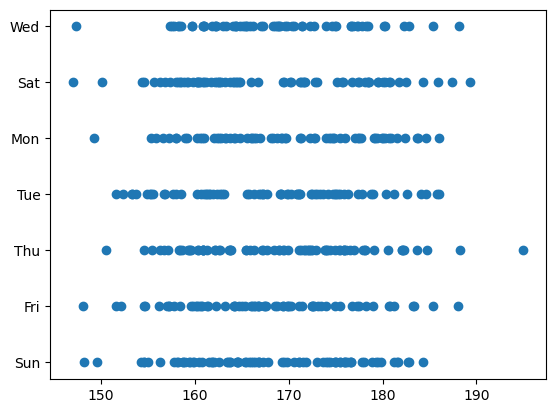

In [14]:
# Another scatter plot 
_ = plt.scatter( df['Height'], df['Day Of Birth'])

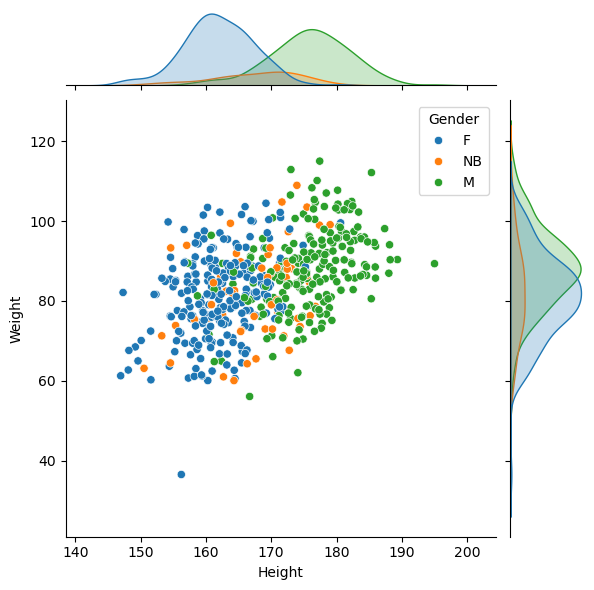

In [15]:
# Jointplot 
_ = sns.jointplot(df, x='Height', y='Weight', hue='Gender' )

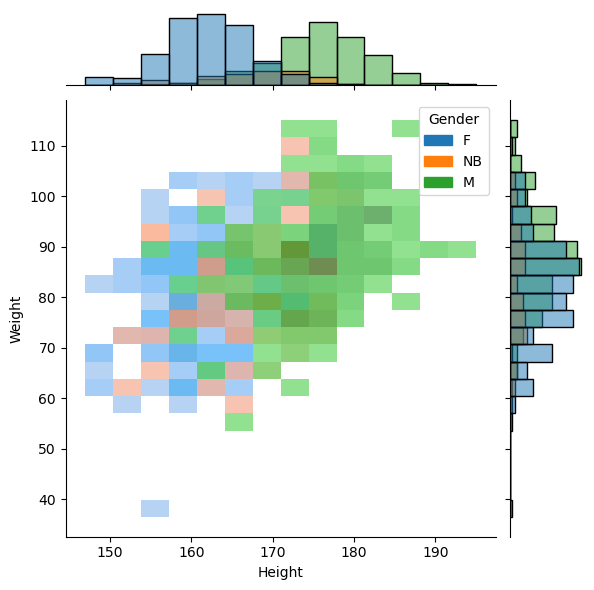

In [16]:
# Another jointplot 
_ = sns.jointplot(df, x='Height', y='Weight', hue='Gender', kind='hist', alpha=0.7 )

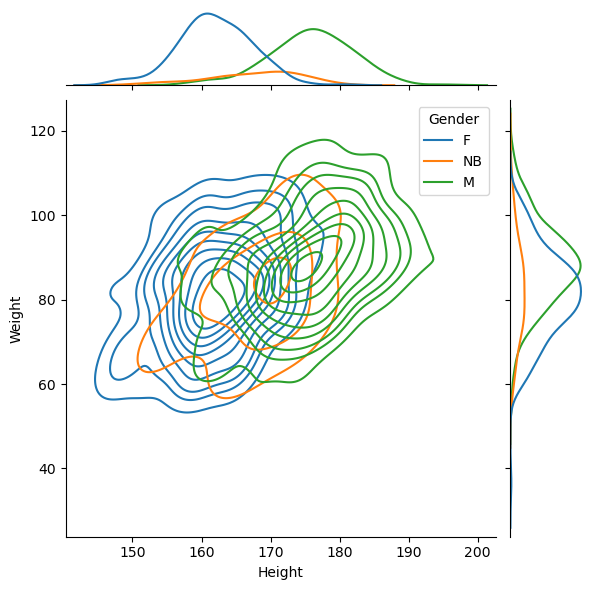

In [17]:
# Another joint plot 
_ = sns.jointplot(df, x='Height', y='Weight', hue='Gender', kind='kde' )

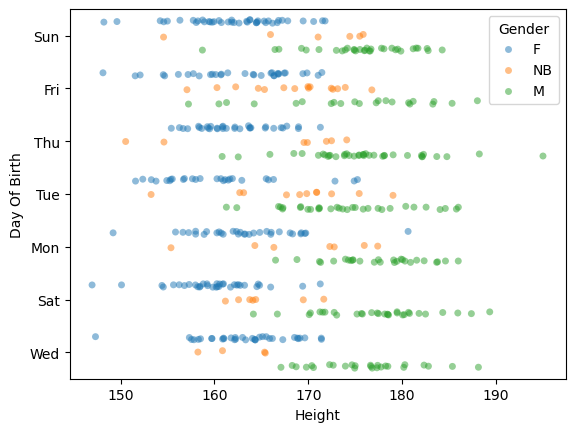

In [18]:
# A stripplot 
_ = sns.stripplot(df, x='Height', y="Day Of Birth", hue="Gender", dodge=True, alpha=0.5)

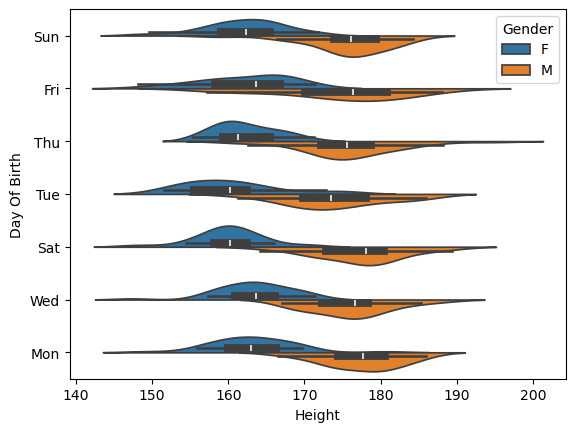

In [19]:
# Violinplot
_ = sns.violinplot(df[df['Gender']!='NB'], x='Height', y='Day Of Birth', hue='Gender', split=True)

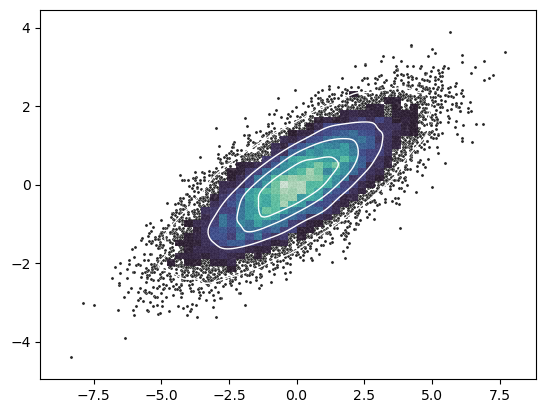

In [20]:
# Overlaying a kdeplot above a histogram and a hitsogram above a scatter plot
x, y = np.random.multivariate_normal( mean=[0,0], cov=[[4,1.5],[1.5,1]], size=20000 ).T
sns.scatterplot( x=x, y=y, s=5, color="0.15" )
sns.histplot( x=x, y=y, bins=50, pthresh=0.1, cmap="mako", alpha=0.85)
_ = sns.kdeplot( x=x, y=y, levels=5, color='w', linewidths=1)

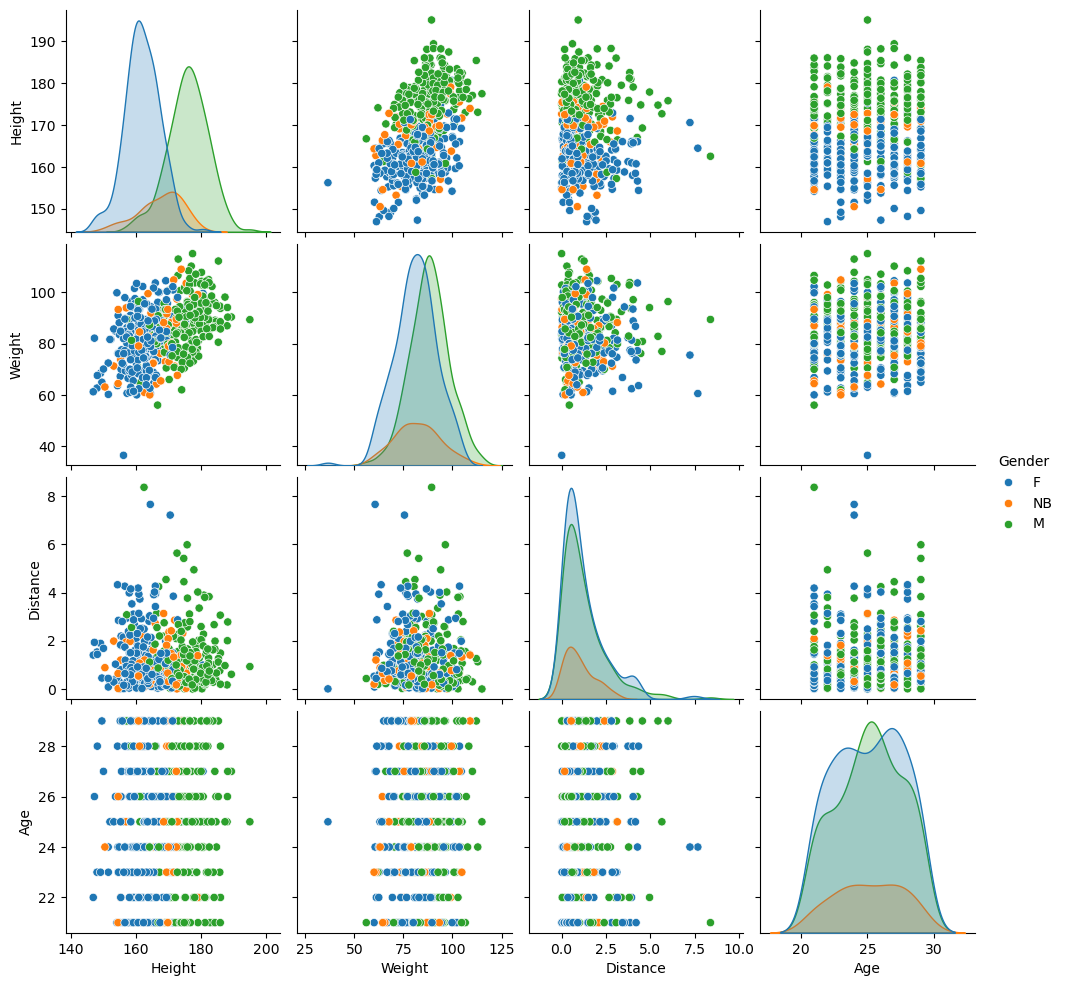

In [21]:
# Multiple pairplots 
_ = sns.pairplot(df, hue="Gender") 